# Mnist 数据集
- 训练集：60000
- 测试集：10000
- 图片：28x28x1 $\rightarrow$ 784

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [2]:
# load data
def load_data(fileName):
    print("Start to read data ...")
    
    # list with data and label
    dataArr = []
    labelArr = []
    
    # open file
    fr = open(fileName, 'r')
    # read data through row
    for line in tqdm(fr.readlines()):
        curline = line.strip().split(',')
        
        # Mnist data is 0 - 9
        # Data
        dataArr.append([int(num) for num in curline[1:]])
        labelArr.append(int(curline[0]))
    
    return dataArr, labelArr

In [3]:
def calcDist(x1, x2):
    """
    计算两样本间的距离
    """
    return np.sqrt(np.sum(np.square(x1 - x2)))

def getClosest(trainDataMat, trainLabelMat, x, topK):
    """
    x : 存放向量x与每一个训练集中样本距离
    """
    distList = [0] * len(trainLabelMat)
    
    # 遍历所有样本点
    for i in range(len(trainDataMat)):
        x1 = trainDataMat[i]
        current_dist = calcDist(x1, x)
        distList[i] = current_dist
    
    topK_List = np.argsort(np.array(distList))[: topK]
    labelList = [0] * 10
    
    for index in topK_List:
        labelList[int(trainLabelMat[index])] += 1
    
    return labelList.index(max(labelList))


In [6]:
start_time = time.time()

trainDataArr, trainLabelArr = load_data('./mnist/mnist_train.csv')
testDataArr, testLabelArr = load_data('./mnist/mnist_test.csv')

print(len(trainDataArr), len(trainLabelArr))

# 训练并测试KNN-model
trainDataMat = np.mat(trainDataArr)
trainLabelMat = np.mat(trainLabelArr).T

testDataMat = np.mat(testDataArr)
testLabelMat = np.mat(testLabelArr).T

# 
topK = 25

# 错误率统计
error_count = 0

# 预测的标记
y_predict = []

# 选用200个测试样本
for i in range(200):
    if not i % 10:
        print("test %d: %d" % (i, 200))

    x = testDataMat[i]
    y_pre = getClosest(trainDataMat, trainLabelMat, x, topK)
    y_predict.append(y_pre)

    if y_pre != testLabelMat[i]:
        error_count += 1

# calculate accuracy
acc = 1 - (error_count / 200)
print("Accuracy: %d" %(acc * 100), '%')

end_time = time.time()
print('time span: ', end_time - start_time)

Start to read data ...


100%|███████████████████████████████████| 60000/60000 [00:08<00:00, 7065.57it/s]


Start to read data ...


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 7806.57it/s]


60000 60000
test 0: 200
test 10: 200
test 20: 200
test 30: 200
test 40: 200
test 50: 200
test 60: 200
test 70: 200
test 80: 200
test 90: 200
test 100: 200
test 110: 200
test 120: 200
test 130: 200
test 140: 200
test 150: 200
test 160: 200
test 170: 200
test 180: 200
test 190: 200
Accuracy: 97 %
time span:  275.67059206962585


In [7]:
y_predict[0: 10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [8]:
testLabelArr[0: 10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

# confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline

In [10]:
def plot_confusion_matrix(true_label, pred_label, class_name):
    y_true = true_label
    y_pred = pred_label
    confusion_mat = confusion_matrix(y_true, y_pred)
    print(confusion_mat)
    
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    plt.figure(figsize=(4, 3), dpi = 300)
    plt.imshow(confusion_mat, cmap = plt.cm.get_cmap("Blues"))
    plt.colorbar()
    
    indices = range(len(confusion_mat))
    
    plt.xticks(indices, class_name, rotation = 0)
    plt.yticks(indices, class_name)
    
    plt.title("confusion matrix", fontdict={'fontsize': 12})
    plt.xlabel("Predcited label", fontdict={'fontsize': 12})
    plt.ylabel("True label", fontdict= {'fontsize': 12})
    
    for first_index in range(len(confusion_mat)):
        for second_index in range(len(confusion_mat[first_index])):
            if first_index == second_index:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'white', fontsize = 12, va = 'center', ha = 'center')
            else:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'black', fontsize = 12, va = 'center', ha = 'center')
                
    plt.show()

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  2 13  0  0  0  0  1  0  0]
 [ 0  1  0 15  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  1]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  1  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 21]]


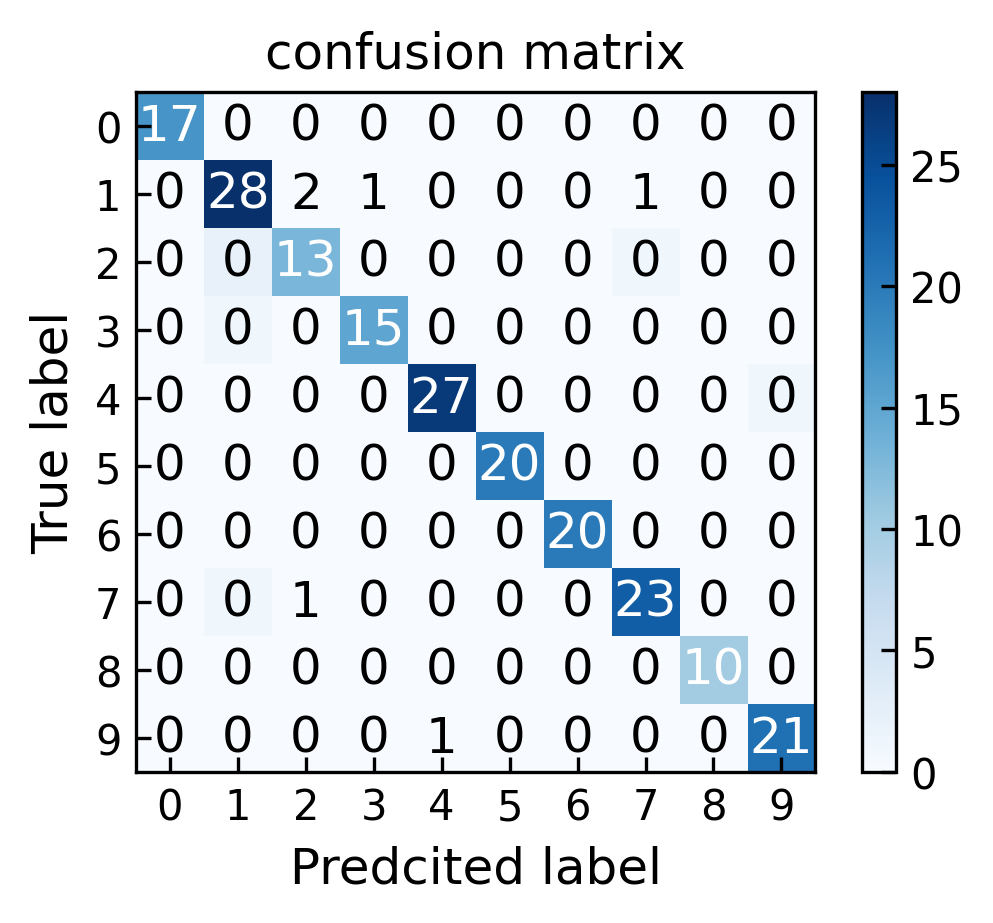

In [13]:
y_true = testLabelArr[0: 200]
class_name = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
plot_confusion_matrix(y_true, y_predict, class_name)

In [14]:
testLabelMat

matrix([[7],
        [2],
        [1],
        ...,
        [4],
        [5],
        [6]])

In [15]:
trainDataMat[0].shape

(1, 784)